# General Health Study of Asia
### Study of the health evolution in Asia regarding the vaccination coverage of Hepatitis B, Polio, Diphtheria, the reported cases of Measles and the prevalence of HIV/AIDS.

## Dependencies

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Filtering of the DataFrame

In [3]:
# Display the CSV file
datafile_df = pd.read_csv("../Group_Project_1/Datafile1_per_region.csv")

datafile_df. head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income Composition of Resources,Schooling,Region
0,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
1,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
2,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
3,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia
4,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,9.20,66,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,Asia


In [4]:
#Filter the DataFrame to only keep the countries from 'Asia' region
regions_to_include = ['Asia']

# Filter the DataFrame based on the regions in regions_to_include
asia_df = datafile_df[datafile_df['Region'].isin(regions_to_include)]

# Display the first few rows of the filtered DataFrame
asia_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income Composition of Resources,Schooling,Region
0,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
1,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
2,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
3,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia
4,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,9.20,66,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,Asia


#  Study of Hepatitis B vaccination coverage within the African population

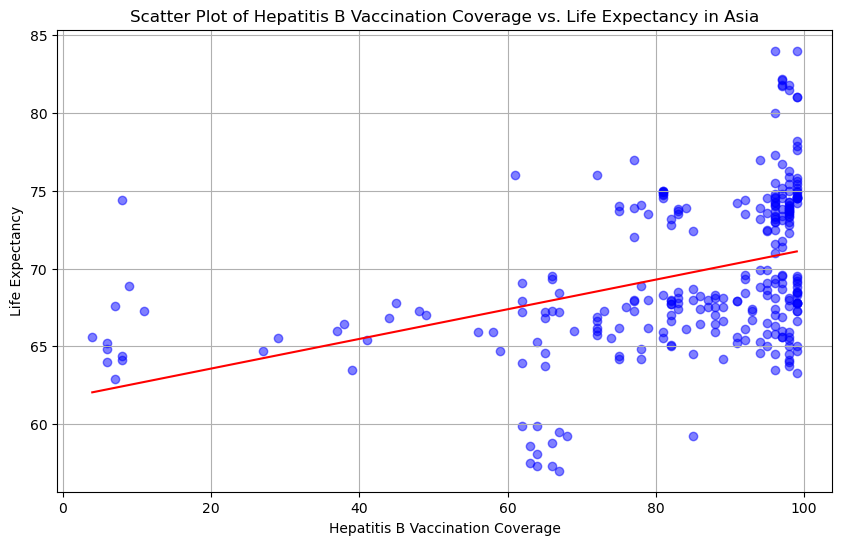

In [10]:
# Build scatter plot for Hepatitis B vaccination coverage vs. Life expectancy in Asia

plt.figure(figsize=(10, 6))
plt.scatter(asia_df['Hepatitis B'], asia_df['Life expectancy'], alpha=0.5, color='blue')
plt.xlabel('Hepatitis B Vaccination Coverage')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Hepatitis B Vaccination Coverage vs. Life Expectancy in Asia')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(asia_df['Hepatitis B'], asia_df['Life expectancy'])
x_values = np.linspace(min(asia_df['Hepatitis B']), max(asia_df['Hepatitis B']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label=f'Regression Line (R-squared = {r_value**2:.2f})')

plt.grid(True)  

plt.show()

In [7]:
# Group the data by 'Year' and calculate the mean Hepatitis B vaccination coverage for each year
hepatitis_b_evolution = asia_df.groupby('Year')['Hepatitis B'].mean().reset_index()

hepatitis_b_evolution

,Year,Hepatitis B
0,2004,72.280000
1,2005,75.320000
2,2006,79.961538
3,2007,82.269231
4,2008,86.384615
5,2009,88.346154
6,2010,87.769231
7,2011,85.538462
8,2012,85.423077
9,2013,87.038462


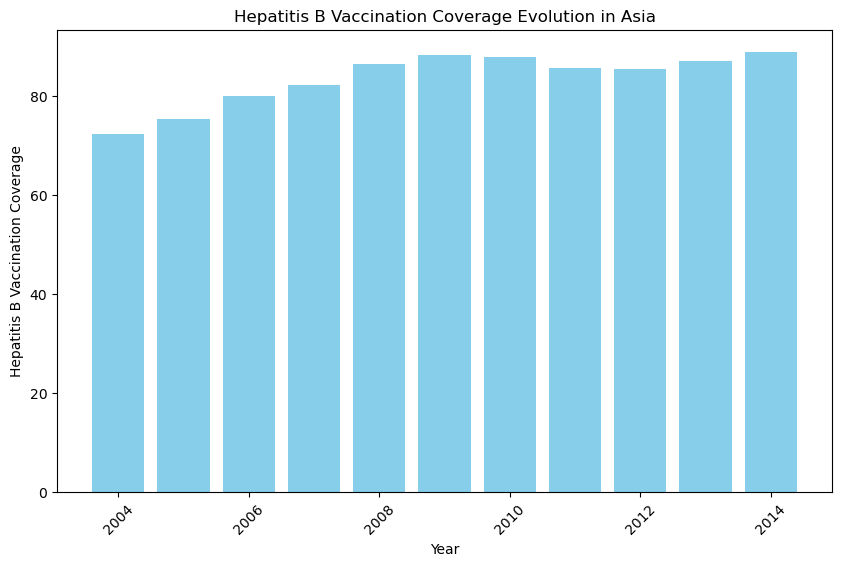

In [9]:
# Build bar plot for Hepatitis B vaccination coverage evolution per year in Asia

plt.figure(figsize=(10, 6))
plt.bar(hepatitis_b_evolution['Year'], hepatitis_b_evolution['Hepatitis B'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Hepatitis B Vaccination Coverage')
plt.title('Hepatitis B Vaccination Coverage Evolution in Asia')
plt.xticks(rotation=45)  

plt.show()

# Study of Polio vaccination coverage within the Asian population

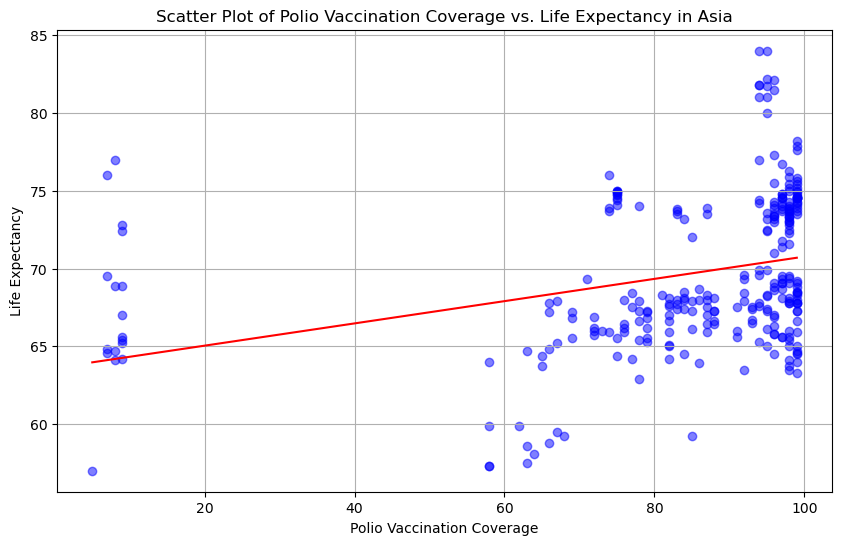

In [14]:
# Build scatter plot for Polio vaccination coverage vs. Life expectancy in Asia

plt.figure(figsize=(10, 6))
plt.scatter(asia_df['Polio'], asia_df['Life expectancy'], alpha=0.5, color='blue')
plt.xlabel('Polio Vaccination Coverage')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Polio Vaccination Coverage vs. Life Expectancy in Asia')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(asia_df['Polio'], asia_df['Life expectancy'])
x_values = np.linspace(min(asia_df['Polio']), max(asia_df['Polio']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label=f'Regression Line (R-squared = {r_value**2:.2f})')

plt.grid(True)

plt.show()

In [15]:
# Group the data by 'Year' and calculate the mean of Polio vaccination coverage for each year

polio_evolution = asia_df.groupby('Year')['Polio'].mean().reset_index()

polio_evolution

,Year,Polio
0,2004,77.640000
1,2005,80.800000
2,2006,81.115385
3,2007,87.923077
4,2008,86.269231
5,2009,84.461538
6,2010,85.961538
7,2011,84.115385
8,2012,84.538462
9,2013,86.615385


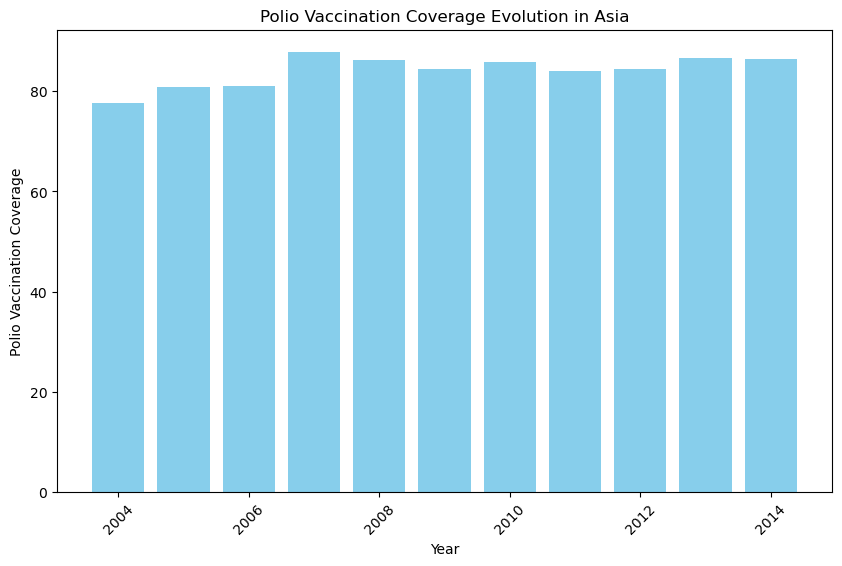

In [16]:
# Build bar plot for Polio vaccination coverage evolution per year in Asia

plt.figure(figsize=(10, 6))
plt.bar(polio_evolution['Year'], polio_evolution['Polio'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Polio Vaccination Coverage')
plt.title('Polio Vaccination Coverage Evolution in Asia')
plt.xticks(rotation=45)  

plt.show()

# Study of Diphteria vaccination coverage within the Asian population

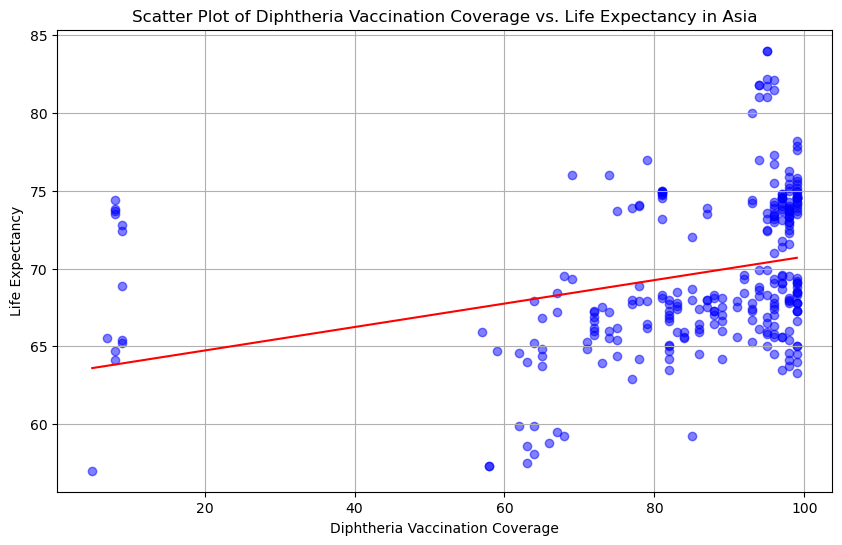

In [18]:
# Build scatter plot for Diphtheria vaccination coverage vs. Life expectancy in Asia

plt.figure(figsize=(10, 6))
plt.scatter(asia_df['Diphtheria'], asia_df['Life expectancy'], alpha=0.5, color='blue')
plt.xlabel('Diphtheria Vaccination Coverage')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Diphtheria Vaccination Coverage vs. Life Expectancy in Asia')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(asia_df['Diphtheria'], asia_df['Life expectancy'])
x_values = np.linspace(min(asia_df['Diphtheria']), max(asia_df['Diphtheria']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label=f'Regression Line (R-squared = {r_value**2:.2f})')

plt.grid(True)

plt.show()

In [19]:
# Group the data by 'Year' and calculate the mean of Diphtheria vaccination coverage for each year

diphtheria_evolution = asia_df.groupby('Year')['Diphtheria'].mean().reset_index()

diphtheria_evolution

,Year,Diphtheria
0,2004,80.440000
1,2005,80.040000
2,2006,78.192308
3,2007,81.346154
4,2008,85.807692
5,2009,86.384615
6,2010,86.192308
7,2011,90.076923
8,2012,87.115385
9,2013,90.038462


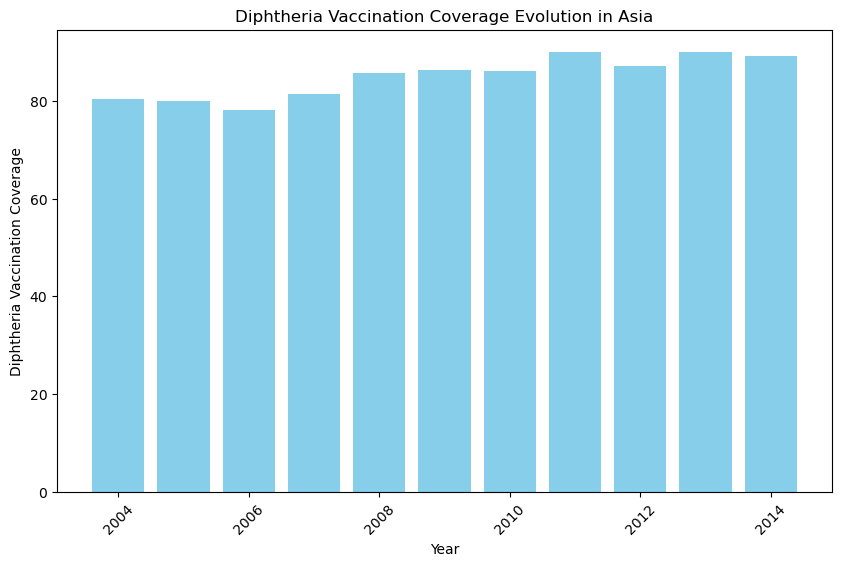

In [20]:
# Build bar plot for Diphtheria vaccination coverage evolution per year in Asia

plt.figure(figsize=(10, 6))
plt.bar(diphtheria_evolution['Year'], diphtheria_evolution['Diphtheria'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Diphtheria Vaccination Coverage')
plt.title('Diphtheria Vaccination Coverage Evolution in Asia')
plt.xticks(rotation=45)  

plt.show()

# Comparison of the previous studies within the timeframe 2004-2014

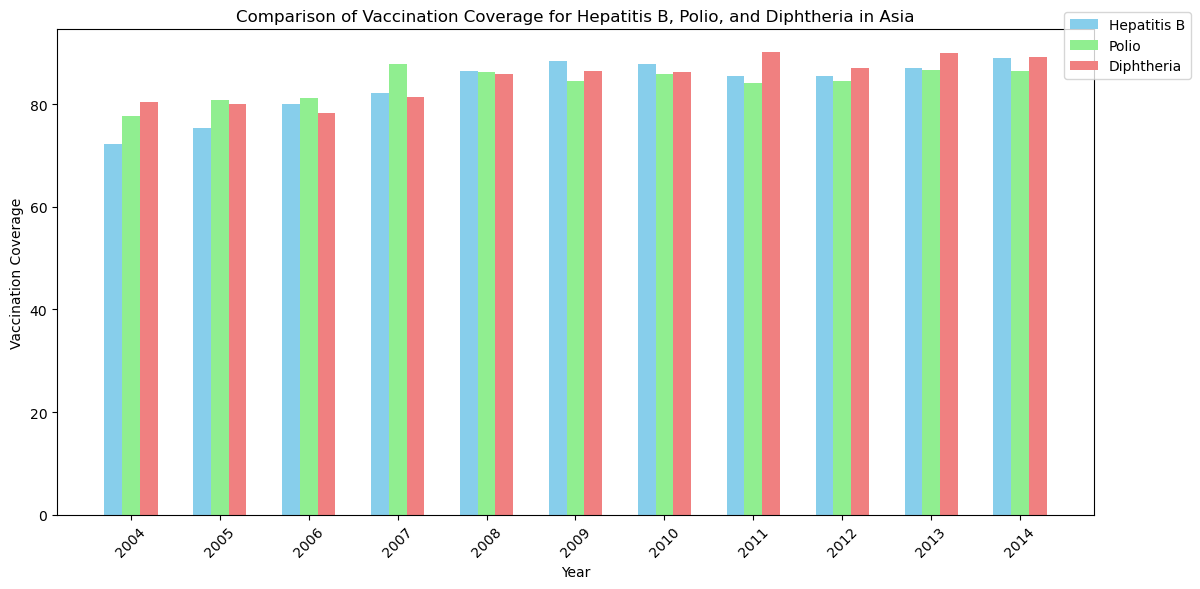

In [22]:
# Comparison of the vaccination coverages for Hepatitis B, Polio and Diphtheria

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
years = hepatitis_b_evolution['Year']

# Plot Hepatitis B data
ax.bar(years - bar_width, hepatitis_b_evolution['Hepatitis B'], width=bar_width, color='skyblue', label='Hepatitis B')

# Plot Polio data
ax.bar(years, polio_evolution['Polio'], width=bar_width, color='lightgreen', label='Polio')

# Plot Diphtheria data
ax.bar(years + bar_width, diphtheria_evolution['Diphtheria'], width=bar_width, color='lightcoral', label='Diphtheria')

# Set x-axis labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Vaccination Coverage')
ax.set_title('Comparison of Vaccination Coverage for Hepatitis B, Polio, and Diphtheria in Asia')
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.tight_layout()
plt.show()

# Study of the prevalance of HIV/AIDS within the African population

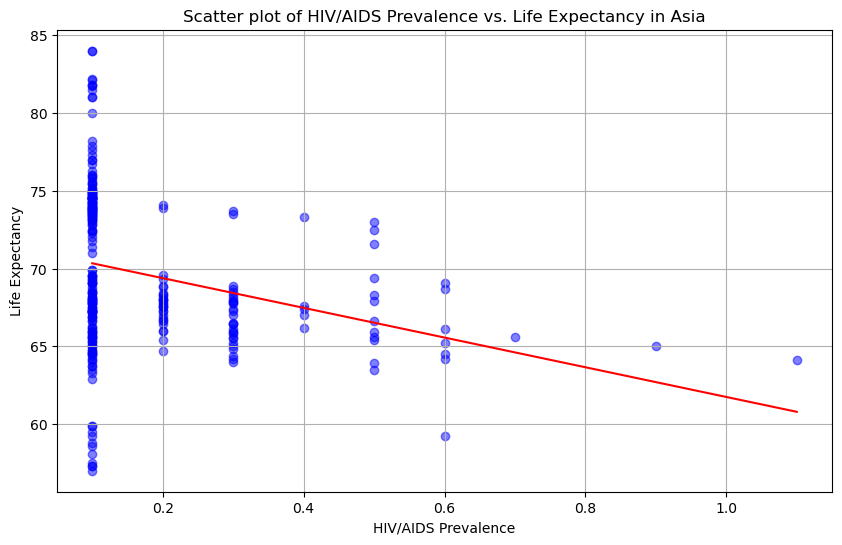

In [24]:
# Build scatter plot for HIV/AIDS prevalence(percentage) vs. Life expectancy in Asia

plt.figure(figsize=(10, 6))
plt.scatter(asia_df['HIV/AIDS'], asia_df['Life expectancy'], alpha=0.5, color='blue')
plt.xlabel('HIV/AIDS Prevalence')
plt.ylabel('Life Expectancy')
plt.title('Scatter plot of HIV/AIDS Prevalence vs. Life Expectancy in Asia')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(asia_df['HIV/AIDS'], asia_df['Life expectancy'])
x_values = np.linspace(min(asia_df['HIV/AIDS']), max(asia_df['HIV/AIDS']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label=f'Regression Line (R-squared = {r_value**2:.2f})')

plt.grid(True)

plt.show()

In [26]:
# Group the data by 'Year' and calculate the mean of HIV/AIDS prevalence for each year

hivaids_evolution = asia_df.groupby('Year')['HIV/AIDS'].mean().reset_index()

hivaids_evolution

,Year,HIV/AIDS
0,2004,0.168000
1,2005,0.168000
2,2006,0.211538
3,2007,0.200000
4,2008,0.192308
5,2009,0.180769
6,2010,0.173077
7,2011,0.161538
8,2012,0.161538
9,2013,0.150000


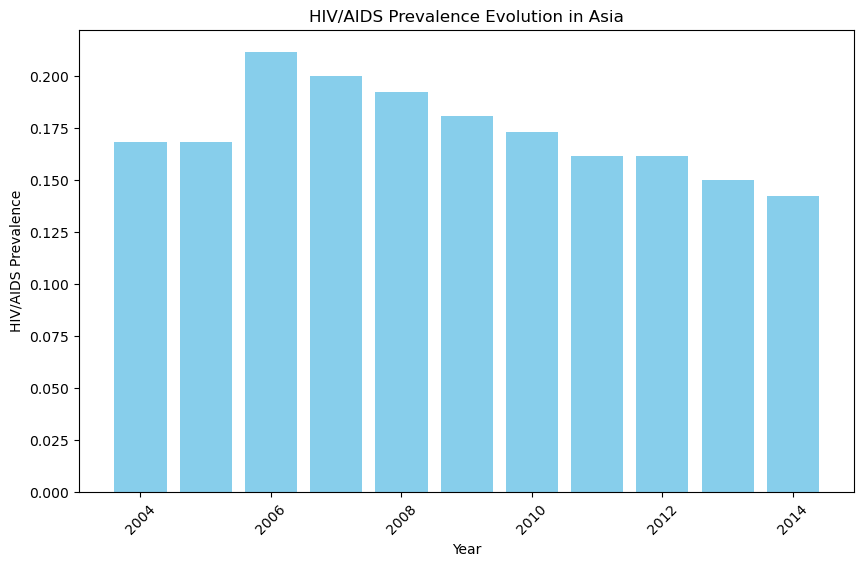

In [27]:
# Build bar plot for HIV/AIDS prevalence evolution per year in Asia

plt.figure(figsize=(10, 6))
plt.bar(hivaids_evolution['Year'], hivaids_evolution['HIV/AIDS'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('HIV/AIDS Prevalence')
plt.title('HIV/AIDS Prevalence Evolution in Asia')
plt.xticks(rotation=45)  

plt.show()

# Study of the Measles reported cases within the African population

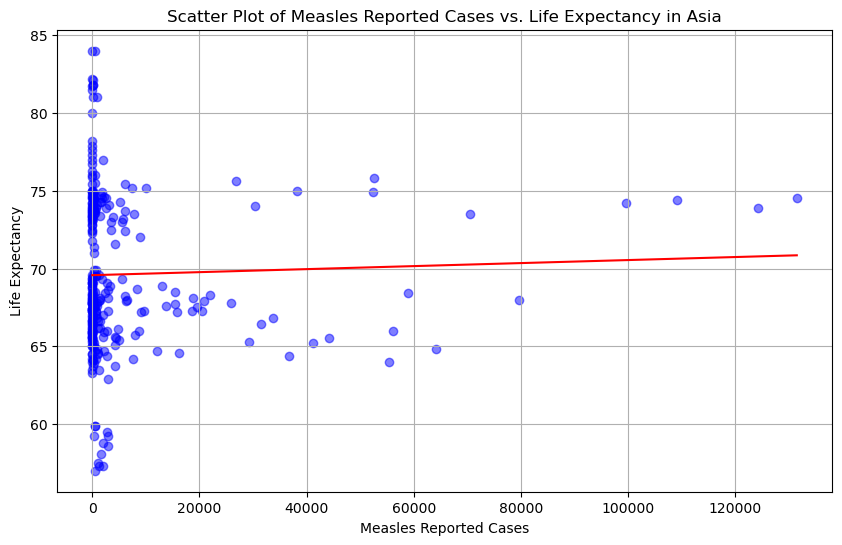

In [30]:
# Build scatter plot for Measles reported cases vs. Life expectancy in Asia

plt.figure(figsize=(10, 6))
plt.scatter(asia_df['Measles'], asia_df['Life expectancy'], alpha=0.5, color='blue')
plt.xlabel('Measles Reported Cases')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Measles Reported Cases vs. Life Expectancy in Asia') 

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(asia_df['Measles'], asia_df['Life expectancy'])
x_values = np.linspace(min(asia_df['Measles']), max(asia_df['Measles']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label=f'Regression Line (R-squared = {r_value**2:.2f})')

plt.grid(True)  

plt.show()

In [31]:
# Group the data by 'Year' and calculate the mean of Measles reported cases for each year

measles_evolution = asia_df.groupby('Year')['Measles'].mean().reset_index()

measles_evolution

,Year,Measles
0,2004,8673.920000
1,2005,9751.080000
2,2006,8116.461538
3,2007,7185.230769
4,2008,8388.384615
5,2009,6819.576923
6,2010,4113.692308
7,2011,3712.538462
8,2012,2616.846154
9,2013,3052.192308


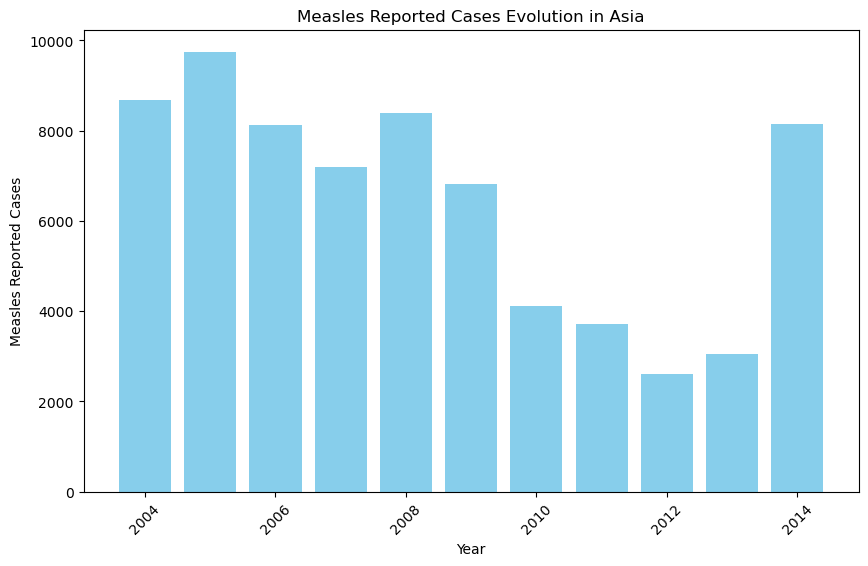

In [32]:
# Build bar plot for Measles reported cases evolution per year in Asia

plt.figure(figsize=(10, 6))
plt.bar(measles_evolution['Year'], measles_evolution['Measles'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Measles Reported Cases')
plt.title('Measles Reported Cases Evolution in Asia')
plt.xticks(rotation=45)  

plt.show()

In [38]:
asia_df_copy = asia_df.copy() #to avoid errors

# Calculate Measles Cases per Capita in the copied DataFrame
asia_df_copy['Measles per Capita'] = (asia_df_copy['Measles'] / asia_df_copy['Population']) * 1000

# Display the updated DataFrame with the new column
print(asia_df_copy[['Country', 'Year', 'Measles', 'Population', 'Measles per Capita']])

# Calculate the mean for the entire Africa DataFrame
mean_measles_per_capita = asia_df_copy['Measles per Capita'].mean()

# Display the mean value
print(f"Mean Measles per Capita: {mean_measles_per_capita:.2f}")

         Country  Year  Measles  Population  Measles per Capita
0    Afghanistan  2014      492    327582.0            1.501914
1    Afghanistan  2013      430  31731688.0            0.013551
2    Afghanistan  2012     2787   3696958.0            0.753863
3    Afghanistan  2011     3013   2978599.0            1.011549
4    Afghanistan  2010     1989   2883167.0            0.689866
..           ...   ...      ...         ...                 ...
990   Uzbekistan  2008        2     27328.0            0.073185
991   Uzbekistan  2007      863     26868.0           32.119994
992   Uzbekistan  2006      823   2648825.0            0.310704
993   Uzbekistan  2005      737     26167.0           28.165246
994   Uzbekistan  2004       75   2586435.0            0.028997

[284 rows x 5 columns]
Mean Measles per Capita: 96.83


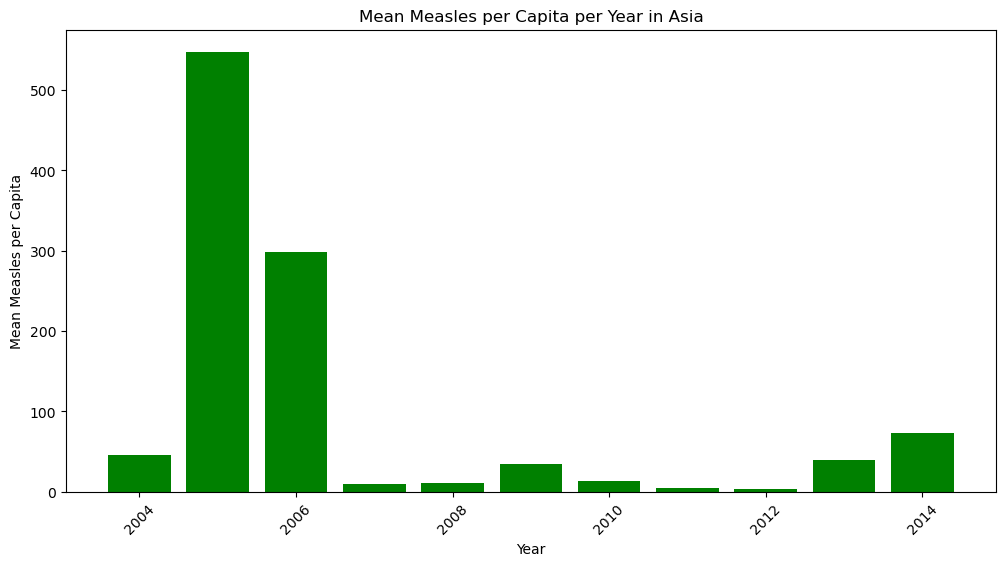

In [41]:
# Group the data by 'Year' and calculate the mean for 'Measles per Capita'
mean_measles_by_year = asia_df_copy.groupby('Year')['Measles per Capita'].mean().reset_index()

# Create a bar plot for the mean Measles per Capita per year
plt.figure(figsize=(12, 6))
plt.bar(mean_measles_by_year['Year'], mean_measles_by_year['Measles per Capita'], color='green')
plt.xlabel('Year')
plt.ylabel('Mean Measles per Capita')
plt.title('Mean Measles per Capita per Year in Asia')
plt.xticks(rotation=45)
plt.show()